## Dataset Overview

The **medical insurance dataset** encompasses various factors influencing medical expenses, such as:

- **Rows:** ~2.7K  
- **Columns:** 7  

### Features

1. **Age** – Age of the individual  
2. **Sex** – Gender of the individual (`male`, `female`)  
3. **BMI** – Body Mass Index  
4. **Children** – Number of children covered by health insurance  
5. **Smoker** – Smoking status (`yes`, `no`)  
6. **Region** – Residential area in the US (`northeast`, `northwest`, `southeast`, `southwest`)  
7. **Charges** – Medical insurance cost (target variable)


**Import Dependencies**

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics

**Data Collection**

In [2]:
# Loading the dataset in a pandas dataframe 
insurance_data = pd.read_csv("C:/Users/USER/Desktop/Datasets/medical_insurance.csv")
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#Checking the number of rows and columns
insurance_data.shape

(2772, 7)

In [4]:
# general info about the dataset 
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [5]:
# Checking for missing values 
insurance_data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Exploratory Data Analysis**

In [6]:
# Statistical measures of the dataset 
insurance_data.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


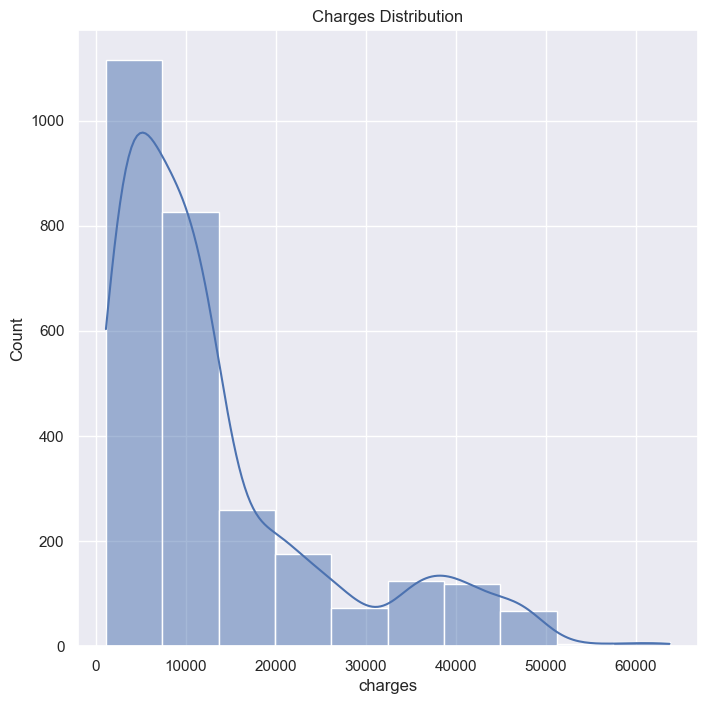

In [7]:
# distribution of age 
sns.set()
plt.figure(figsize=(8,8))
sns.histplot(insurance_data['charges'], kde=True, bins=10)
plt.title('Charges Distribution')
plt.show()

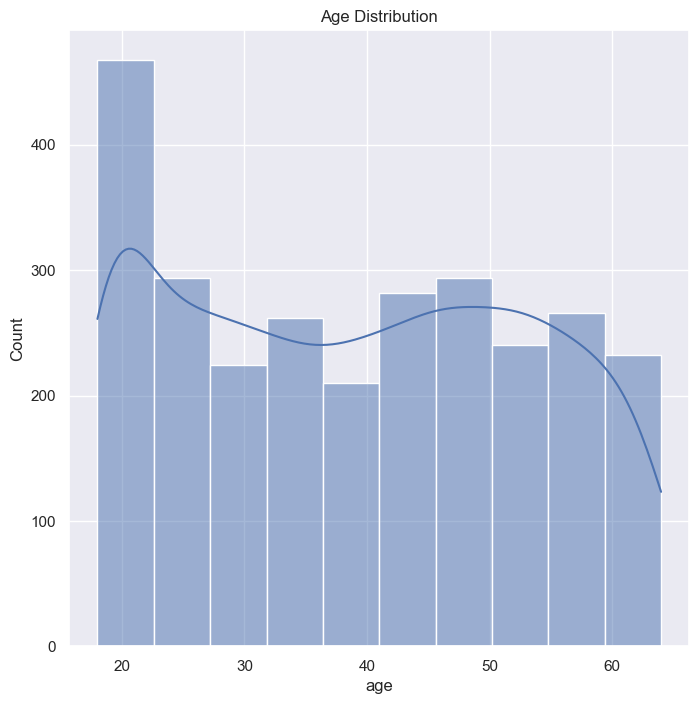

In [8]:
# distribution of age 
plt.figure(figsize=(8,8))
sns.histplot(insurance_data['age'], kde=True, bins=10)
plt.title('Age Distribution')
plt.show()

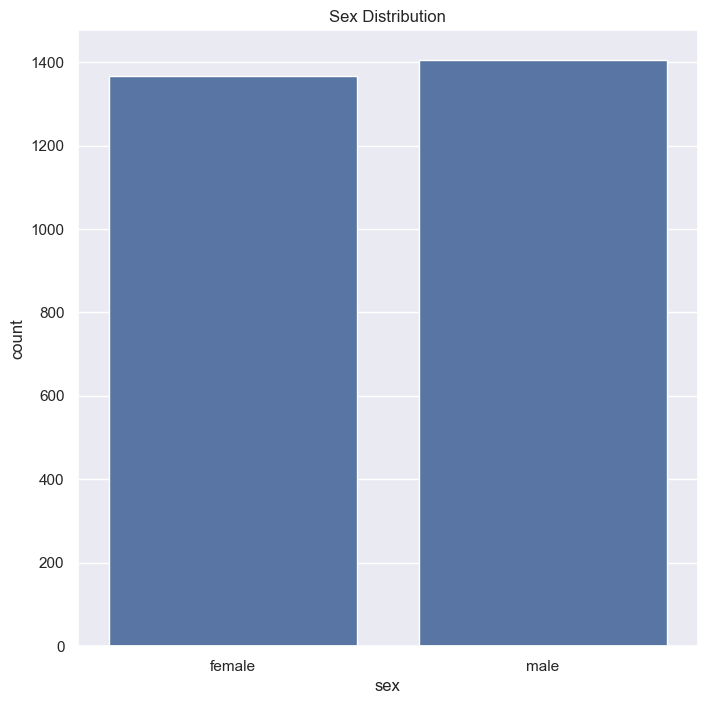

In [9]:
# Sex distribution
plt.figure(figsize=(8,8))
sns.countplot(x='sex', data=insurance_data)
plt.title('Sex Distribution')
plt.show()

In [10]:
# Distibution of sex
insurance_data['sex'].value_counts()

sex
male      1406
female    1366
Name: count, dtype: int64

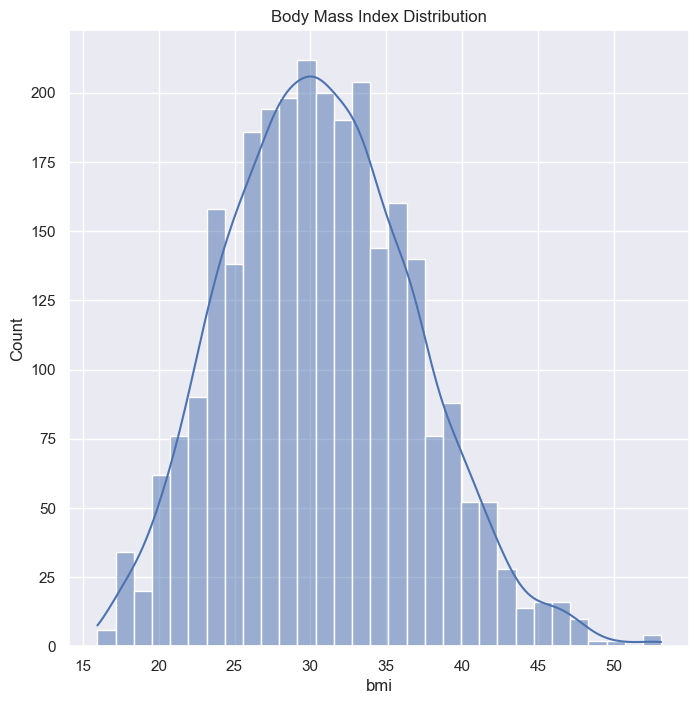

In [11]:
# distribution of bmi 
plt.figure(figsize=(8,8))
sns.histplot(insurance_data['bmi'], kde=True)
plt.title('Body Mass Index Distribution')
plt.show()

Text(0.5, 1.0, 'Number of Children Distribution')

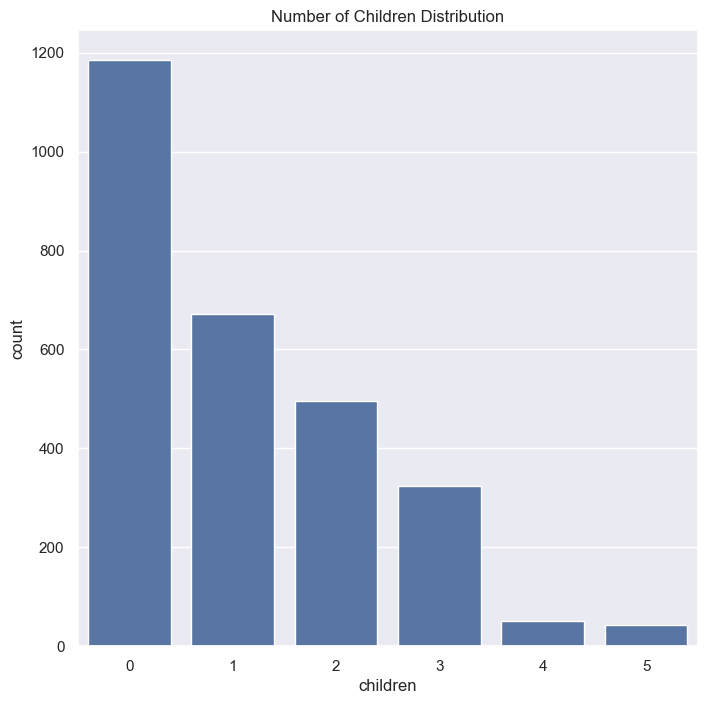

In [12]:
# Children Distribution 
plt.figure(figsize=(8,8))
sns.countplot(x='children', data=insurance_data)
plt.title('Number of Children Distribution')

In [13]:
# Number of Children Distribution
insurance_data['children'].value_counts()

children
0    1186
1     672
2     496
3     324
4      52
5      42
Name: count, dtype: int64

Text(0.5, 1.0, 'Smokers Distribution')

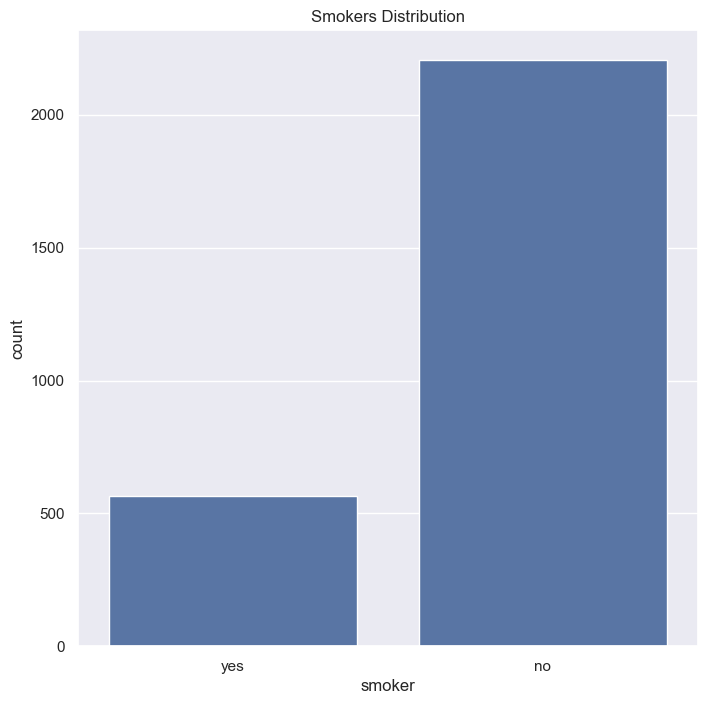

In [14]:
# Smokers Distribution 
plt.figure(figsize=(8,8))
sns.countplot(x='smoker', data=insurance_data)
plt.title('Smokers Distribution')

In [15]:
# Smokers Distribution
insurance_data['smoker'].value_counts()

smoker
no     2208
yes     564
Name: count, dtype: int64

Text(0.5, 1.0, 'Regional Distribution')

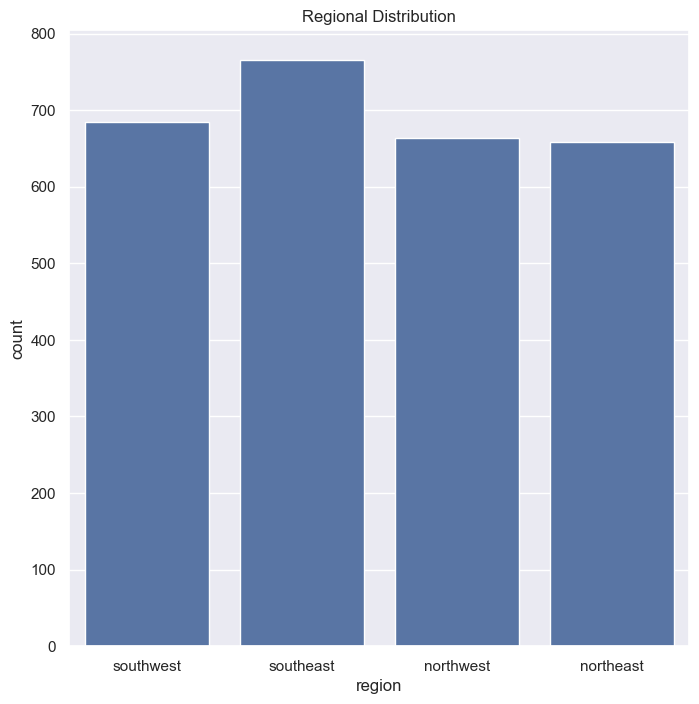

In [16]:
# Region Distribution 
plt.figure(figsize=(8,8))
sns.countplot(x='region', data=insurance_data)
plt.title('Regional Distribution')

In [17]:
# Region Distribution
insurance_data['region'].value_counts()

region
southeast    766
southwest    684
northwest    664
northeast    658
Name: count, dtype: int64

**Data Preprocessing**

In [18]:
# handle outliers in charges using log transformation
insurance_data['charges'] = np.log1p(insurance_data['charges'])

In [19]:
insurance_data['sex'] = insurance_data['sex'].map({'male': 0, 'female': 1})
insurance_data['smoker'] = insurance_data['smoker'].map({'yes': 0, 'no': 1})
insurance_data['region'] = insurance_data['region'].map({
    'southeast': 0,
    'southwest': 1,
    'northeast': 2,
    'northwest': 3
})


In [20]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,9.734236
1,18,0,33.770,1,1,0,7.453882
2,28,0,33.000,3,1,0,8.400763
3,33,0,22.705,0,1,3,9.998137
4,32,0,28.880,0,1,3,8.260455


**Splitting the Features and Target** 

In [21]:
X = insurance_data.drop(columns='charges', axis=1)
Y = insurance_data['charges']

In [22]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
2767   47    1  45.320         1       1       0
2768   21    1  34.600         0       1       1
2769   19    0  26.030         1       0       3
2770   23    0  18.715         0       1       3
2771   54    0  31.600         0       1       1

[2772 rows x 6 columns]


In [23]:
print(Y)

0       9.734236
1       7.453882
2       8.400763
3       9.998137
4       8.260455
          ...   
2767    9.056124
2768    7.611435
2769    9.708196
2770    9.980281
2771    9.195372
Name: charges, Length: 2772, dtype: float64


**Splitting Training and Test Data**

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=13)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(2772, 6) (2356, 6) (416, 6)


**Model Training: LinearRegression**

In [26]:
model = LinearRegression()

In [27]:
model.fit(X_train, Y_train)

LinearRegression()

**Model Evaluation**

In [28]:
X_train_prediction = model.predict(X_train)

# R Squared Error on training data
R2_training = metrics.r2_score(X_train_prediction, Y_train)
# Root Mean Square Error on train data 
RMSE_training = metrics.root_mean_squared_error(X_train_prediction, Y_train)

print('R Squared Error on Training data  :', R2_training)
print('Root Mean Squared Error on Training data  :', RMSE_training)

R Squared Error on Training data  : 0.6861546914580887
Root Mean Squared Error on Training data  : 0.4550040844405939


In [29]:
X_test_prediction = model.predict(X_test)

# R Squared Error on training data
R2_test = metrics.r2_score(X_test_prediction, Y_test)
# Root Mean Square Error on train data 
RMSE_test = metrics.root_mean_squared_error(X_test_prediction, Y_test)

print('Test data R Squared Error :', R2_test)
print('Test data Root Mean Squared Error :', RMSE_test)

Test data R Squared Error : 0.7037227754582545
Test data Root Mean Squared Error : 0.407120517796381
